In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train

test_images, test_labels = test

test_images = test_images/255.0
test_labels = test_labels.astype(np.int32)


test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.batch(16)

new_model = tf.keras.models.load_model('f_mnist_model.h5')
# new_model.summary()

# new_model.predict()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8973 - loss: 0.4645
Dokładność na zbiorze testowym: 0.8984
Prawdziwa klasa: 9, Przewidziana klasa: 9
Prawdziwa klasa: 2, Przewidziana klasa: 2
Prawdziwa klasa: 1, Przewidziana klasa: 1
Prawdziwa klasa: 1, Przewidziana klasa: 1
Prawdziwa klasa: 6, Przewidziana klasa: 6


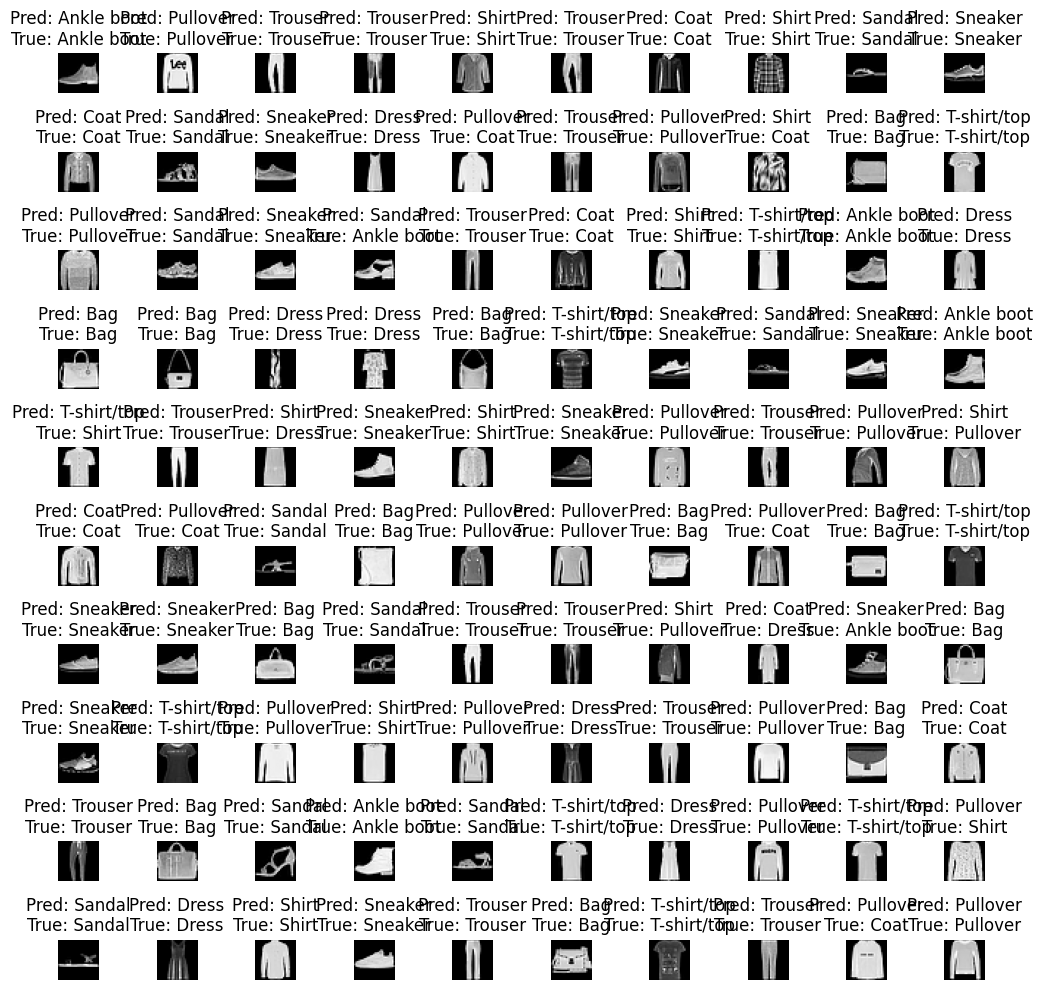

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Załadowanie zapisanego modelu
model = keras.models.load_model('f_mnist_model.h5')

# Załadowanie danych testowych z Fashion MNIST
(_, _), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Przygotowanie danych (normalizacja)
X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

# Wykonanie predykcji
predictions = model.predict(X_test)

# Konwersja predykcji na klasy
predicted_classes = np.argmax(predictions, axis=1)

# Sprawdzenie dokładności modelu - bez konwersji y_test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Dokładność na zbiorze testowym: {test_accuracy:.4f}')

# Aby zobaczyć pojedyncze predykcje
for i in range(5):  # pokazuje pierwsze 5 przykładów
    print(f'Prawdziwa klasa: {y_test[i]}, Przewidziana klasa: {predicted_classes[i]}')

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Nazwy klas w Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[y_test[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()